# SAT & ACT 2007 2008 Analysis

## Problem Statement

Every year, there are millions of students in United States taking either SAT or ACT. In this project, we are going to look at which states are doing well for each test, which states participate more, and are people shifting from one exam to another exam ?

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import itertools
import seaborn as sns
import os
warnings.filterwarnings('ignore')

## 2017 Data Import and Cleaning

### 1. Read In SAT & ACT  Data

In [2]:
sat_2017 = pd.read_csv("data/sat_2017.csv")
act_2017 = pd.read_csv("data/act_2017.csv")

### 2. Display Data

In [3]:
# SAT data
sat_2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
# ACT data
act_2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


### 3. Verbally Describe Data

- SAT data shows the participation rate, average Evidence-Based Reading and Writing score, Math score and Total score for each state.

- ACT data shows the participation rate, average English score, Math score, Reading score, Science score and Composite score for each state.

Note: ACT data also shows the national data

### 4. Does the data look complete? 

In [5]:
sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
act_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 2.9+ KB


- There is no column in both data having null values

- However, the participation columns in both data are represented as an object (most likely string) due to the percentage sign.

- The composite value of ACT data should be float, not object

### 5. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [7]:
def remove_percentage(data):
    try:
        return float(data[:-1])
    except:
        return None

In [8]:
# We are going to convert the participation columns of both SAT and ACT data to float
sat_2017["Participation"] = sat_2017["Participation"].apply(remove_percentage)
act_2017["Participation"] = act_2017["Participation"].apply(remove_percentage)

In [9]:
try:
    act_2017["Composite"].apply(lambda x: float(x))
except ValueError as e:
    print(e)

could not convert string to float: '20.2x'


In Composite column for ACT data, there is a value of "20.2x". This may be the reason making the whole column becoming a string.

The real value is most likely 20.2. We are going to change it to 20.2 for now.

In [10]:
act_2017["Composite"][act_2017["Composite"] == "20.2x"] = 20.2;

In [11]:
try:
    act_2017["Composite"] = act_2017["Composite"].apply(lambda x: float(x))
except ValueError as e:
    print(e)

### 6a. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

In [12]:
round(sat_2017.describe(),2)

,Participation,Evidence-Based Reading and Writing,Math,Total
count,51.00,51.00,51.00,51.00
mean,39.80,569.12,547.63,1126.10
std,35.28,45.67,84.91,92.49
min,2.00,482.00,52.00,950.00
25%,4.00,533.50,522.00,1055.50
50%,38.00,559.00,548.00,1107.00
75%,66.00,613.00,599.00,1212.00
max,100.00,644.00,651.00,1295.00


In [13]:
round(act_2017.describe(),2)

,Participation,English,Math,Reading,Science,Composite
count,52.00,52.00,52.00,52.00,52.00,52.00
mean,65.15,20.92,21.17,22.00,21.04,21.51
std,31.83,2.33,1.96,2.05,3.15,2.00
min,8.00,16.30,18.00,18.10,2.30,17.80
25%,31.00,19.00,19.40,20.48,19.90,19.80
50%,68.00,20.55,20.90,21.70,21.15,21.40
75%,100.00,23.30,23.10,24.13,22.52,23.60
max,100.00,25.50,25.30,26.00,24.90,25.50


- The min value of Math score for SAT is only 52, and that of Science for ACT is only 2.3. We are going to take a look at those data

### 6b. Fix any errors you identified

### SAT

In [14]:
sat_2017[sat_2017["Math"] == 52]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69.0,536,52,1060


- There seems to be errors in at least 1 error SAT dataset.
- We are going to create a new_total column and compare it to the original Total column

In [15]:
sat_2017["new_total"] = sat_2017["Evidence-Based Reading and Writing"] + sat_2017["Math"]
sat_2017[sat_2017["new_total"] != sat_2017["Total"]].head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total,new_total
6,Connecticut,100.0,530,512,1041,1042
7,Delaware,100.0,503,492,996,995
12,Idaho,93.0,513,493,1005,1006
15,Iowa,2.0,641,635,1275,1276
18,Louisiana,4.0,611,586,1198,1197


- Since the score shown are the average for the whole state, there may be a small error between the Total and new_total column.
- We are going to get the error margin of +/-2 for this SAT data.

In [16]:
sat_2017[(sat_2017["new_total"] < -2 + sat_2017["Total"]) | 
         (sat_2017["new_total"] > 2 + sat_2017["Total"])]

,State,Participation,Evidence-Based Reading and Writing,Math,Total,new_total
20,Maryland,69.0,536,52,1060,588


- It seems that there is only 1 error in SAT data. We are going to calculate the new Math score for Maryland

In [17]:
sat_2017.Math[sat_2017.State == "Maryland"] =  (sat_2017.Total[sat_2017.State == "Maryland"] 
                                                - sat_2017["Evidence-Based Reading and Writing"][sat_2017.State == "Maryland"]);

In [18]:
del sat_2017["new_total"]
sat_2017[sat_2017["State"] == "Maryland"]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69.0,536,524,1060


### ACT

In [19]:
act_2017[act_2017["Science"] == 2.30]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28.0,23.3,23.1,24.2,2.3,23.6


- There seems to be an error with ACT too

In [20]:
act_2017["new_composite"] = act_2017.loc[:,["English","Math","Reading","Science"]].mean(axis = 1)

- Similarly to SAT score. Since the score shown are the avage for the whole state, there may be a small error between the Total and new_composite column.
- We are going to get the error margin of +/- 1 for this ACT data.

In [21]:
act_2017[(act_2017["new_composite"] < -1 + act_2017["Composite"]) | 
         (act_2017["new_composite"] > 1 + act_2017["Composite"])]

,State,Participation,English,Math,Reading,Science,Composite,new_composite
21,Maryland,28.0,23.3,23.1,24.2,2.3,23.6,18.225


- It seems that there is only 1 error in ACT data. We are going to calculate the new science score for Maryland

In [22]:
act_2017.Science[act_2017.State == "Maryland"] = (act_2017.Composite[act_2017.State == "Maryland"] * 4 -
                                                 act_2017.Math[act_2017.State == "Maryland"] -
                                                 act_2017.English[act_2017.State == "Maryland"] -
                                                 act_2017.Reading[act_2017.State == "Maryland"])

In [23]:
del act_2017["new_composite"]
act_2017[act_2017.State == "Maryland"]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28.0,23.3,23.1,24.2,23.8,23.6


### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns.

In [24]:
sat_2017 = sat_2017.rename(columns={"Evidence-Based Reading and Writing": "ebrw"})
sat_2017 = sat_2017.rename(str.lower, axis = "columns")
sat_2017.columns = ["state"] + [i + "_sat_2017" for i in sat_2017.columns if i != "state"]

In [25]:
sat_2017.head()

,state,participation_sat_2017,ebrw_sat_2017,math_sat_2017,total_sat_2017
0,Alabama,5.0,593,572,1165
1,Alaska,38.0,547,533,1080
2,Arizona,30.0,563,553,1116
3,Arkansas,3.0,614,594,1208
4,California,53.0,531,524,1055


In [26]:
act_2017 = act_2017.rename(str.lower, axis = "columns")
act_2017.columns = ["state"] + [i + "_act_2017" for i in act_2017.columns if i != "state"]

In [27]:
act_2017.head()

,state,participation_act_2017,english_act_2017,math_act_2017,reading_act_2017,science_act_2017,composite_act_2017
0,National,60.0,20.3,20.7,21.4,21.0,21.0
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4


### 8. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [28]:
# Droping national row in ACT dataset
act_2017 = act_2017[act_2017.state != "National"]

### 9. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [29]:
act_sat_2017 = act_2017.join(sat_2017.set_index("state"), on = "state", how = "outer")
act_sat_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1 to 51
Data columns (total 11 columns):
state                     51 non-null object
participation_act_2017    51 non-null float64
english_act_2017          51 non-null float64
math_act_2017             51 non-null float64
reading_act_2017          51 non-null float64
science_act_2017          51 non-null float64
composite_act_2017        51 non-null float64
participation_sat_2017    51 non-null float64
ebrw_sat_2017             51 non-null int64
math_sat_2017             51 non-null int64
total_sat_2017            51 non-null int64
dtypes: float64(7), int64(3), object(1)
memory usage: 4.8+ KB


### 10. Save your cleaned, merged dataframe

In [30]:
act_sat_2017.to_csv(r"data/combined_2017.csv")

## 2018 Data Import and Cleaning

### SAT

In [31]:
import requests
import lxml.html as lh

url= 'https://blog.prepscholar.com/average-sat-scores-by-state-most-recent'
#Create a handle, page, to handle the contents of the website
page = requests.get(url)
#Store the contents of the website under doc
doc = lh.fromstring(page.content)
#Parse data that are stored between <tr>..</tr> of HTML
tr_elements = doc.xpath('//tr')
# Get all the value in the table extracted from the web in a list
col = [t.text_content() for i in range(len(tr_elements)) for t in tr_elements[i]]   
# Make every row a list
col = [col[i:i+5] for i in range(0,len(col),5)]
headers = col.pop(0)
sat_2018 = pd.DataFrame(col,columns = headers)

In [32]:
sat_2018.head()

,State,Participation Rate,EBRW,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


- We are going to rename the columns for sat_2018 so that it will be similar to those of sat_2017

In [33]:
sat_2018 = sat_2018.rename(columns={"Participation Rate": "Participation"})
sat_2018 = sat_2018.rename(str.lower, axis = "columns")
sat_2018.columns = ["state"] + [i + "_sat_2018" for i in sat_2018.columns if i != "state"]

In [34]:
sat_2018.head()

,state,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [35]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
state                     53 non-null object
participation_sat_2018    53 non-null object
ebrw_sat_2018             53 non-null object
math_sat_2018             53 non-null object
total_sat_2018            53 non-null object
dtypes: object(5)
memory usage: 2.1+ KB


- All the columns except state should be a number, we are going to convert them

In [36]:
sat_2018["participation_sat_2018"] = sat_2018["participation_sat_2018"].apply(remove_percentage)

In [37]:
# Since the remaining columns (except state and participation) is int, we are going to convert those columns too int too
for i in sat_2018.columns[2:]:
    sat_2018[i] = sat_2018[i].apply(lambda x: int(x))

In [38]:
sat_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 5 columns):
state                     53 non-null object
participation_sat_2018    51 non-null float64
ebrw_sat_2018             53 non-null int64
math_sat_2018             53 non-null int64
total_sat_2018            53 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB


In [39]:
round(sat_2018.describe(),2)

,participation_sat_2018,ebrw_sat_2018,math_sat_2018,total_sat_2018
count,51.00,53.00,53.00,53.00
mean,46.63,564.79,553.91,1119.21
std,38.01,46.28,51.69,97.83
min,2.00,490.00,445.00,935.00
25%,4.50,534.00,519.00,1053.00
50%,52.00,552.00,544.00,1098.00
75%,79.50,615.00,595.00,1229.00
max,100.00,643.00,655.00,1298.00


- There seems to be no errors with the data for SAT 2018.

### ACT

In [40]:
act_2018 = pd.read_csv("data/act_2018.csv")

In [41]:
act_2018.head()

,state,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
0,Alabama,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100.0,19.4,19.1,18.9,19.7,19.4
4,California,27.0,22.7,22.5,22.5,23.0,22.1


In [42]:
act_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
state                     51 non-null object
participation_act_2018    47 non-null float64
composite_act_2018        51 non-null float64
english_act_2018          51 non-null float64
math_act_2018             51 non-null float64
reading_act_2018          51 non-null float64
science_act_2018          51 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


In [43]:
round(act_2018.describe(),2)

,participation_act_2018,composite_act_2018,english_act_2018,math_act_2018,reading_act_2018,science_act_2018
count,47.00,51.00,51.00,51.00,51.00,51.00
mean,60.09,21.49,20.99,21.13,22.02,21.35
std,33.56,2.11,2.45,2.04,2.17,1.87
min,7.00,17.70,16.60,17.80,18.00,17.90
25%,28.50,19.95,19.10,19.40,20.45,19.85
50%,65.00,21.30,20.20,20.70,21.60,21.10
75%,100.00,23.55,23.70,23.15,24.10,23.05
max,100.00,25.60,26.00,25.20,26.10,24.90


There seems to be no errors for act_2018 too

#### Combine your 2017 and 2018 data into a single dataframe

In [44]:
act_sat_2018 = act_2018.join(sat_2018.set_index("state"), on = "state", how = "outer")
final = act_sat_2017.join(act_sat_2018.set_index("state"), on = "state", how = "outer")
final = final.reset_index()
del final["index"]
final.to_csv(r"data/final.csv")

## Data dictionary
A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions.


|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final|The states in US| 
|participation_sat_2017|float|final|The percentage of student participate in SAT in 2017 in each state (in percentage, 1 represents 1%)|
|read_write_sat_2017|integer|final|The average Evidence-Based Reading and Writing score for SAT in 2017 in each state|
|math_sat_2017|integer|final|The average Math score for SAT in 2017 in each state|
|total_sat_2017|integer|final|The average Total score for SAT in 2017 in each state|
|participation_act_2017|float|final|The percentage of student participate in ACT in 2017 in each state (in percentage, 1 represents 1%)|
|english_act_2017|float|final|The average English score for ACT in 2017 in each state|
|math_act_2017|float|final|The average Math score for ACT in 2017 in each state|
|science_act_2017|float|final|The average Science score for ACT in 2017 in each state|
|composite_act_2017|float|final|The average Composite score for ACT in 2017 in each state (Composite score is calculated as the average of English, Math, Reading and Science exams)|
|participation_sat_2018|float|final|The percentage of student participate in SAT in 2018 in each state (in percentage, 1 represents 1%)|
|read_write_sat_2018|integer|final|The average Evidence-Based Reading and Writing score for SAT in 2018 in each state|
|math_sat_2018|integer|final|The average Math score for SAT in 2018 in each state|
|total_sat_2018|integer|final|The average Total score for SAT in 2018 in each state|
|participation_act_2018|float|final|The percentage of student participate in ACT in 2018 in each state (in percentage, 1 represents 1%)|
|english_act_2018|float|final|The average English score for ACT in 2018 in each state|
|math_act_2018|float|final|The average Math score for ACT in 2018 in each state|
|science_act_2018|float|final|The average Science score for ACT in 2018 in each state|
|composite_act_2018|float|final|The average Composite score for ACT in 2018 in each state (Composite score is calculated as the average of English, Math, Reading and Science exams)|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [45]:
round(final.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
participation_act_2017,51.0,65.25,32.14,8.0,31.00,69.0,100.00,100.0
english_act_2017,51.0,20.93,2.35,16.3,19.00,20.7,23.30,25.5
math_act_2017,51.0,21.18,1.98,18.0,19.40,20.9,23.10,25.3
reading_act_2017,51.0,22.01,2.07,18.1,20.45,21.8,24.15,26.0
science_act_2017,51.0,21.46,1.75,18.2,19.95,21.3,23.20,24.9
composite_act_2017,51.0,21.52,2.02,17.8,19.80,21.4,23.60,25.5
participation_sat_2017,51.0,39.80,35.28,2.0,4.00,38.0,66.00,100.0
ebrw_sat_2017,51.0,569.12,45.67,482.0,533.50,559.0,613.00,644.0
math_sat_2017,51.0,556.88,47.12,468.0,523.50,548.0,599.00,651.0
total_sat_2017,51.0,1126.10,92.49,950.0,1055.50,1107.0,1212.00,1295.0


#### Investigate trends in the data
- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

### ACT

In [46]:
final.sort_values(by = "participation_act_2017")[["state","participation_act_2017","participation_act_2018"]].head()

,state,participation_act_2017,participation_act_2018
19,Maine,8.0,7.0
29,New Hampshire,18.0,16.0
7,Delaware,18.0,17.0
39,Rhode Island,21.0,15.0
38,Pennsylvania,23.0,NaN


In [47]:
final.sort_values(by = "participation_act_2018")[["state","participation_act_2017","participation_act_2018"]].head()

,state,participation_act_2017,participation_act_2018
19,Maine,8.0,7.0
39,Rhode Island,21.0,15.0
29,New Hampshire,18.0,16.0
7,Delaware,18.0,17.0
22,Michigan,29.0,22.0


- For both 2017 and 2018, Maine has the lowest participation rate for ACT of 8% and 7% respectively. New Hamsphire and Delaware are also among the lowest for both 2017 and 2018

In [48]:
highest_part_2017 = final.sort_values(by = "participation_act_2017", ascending = False)[final["participation_act_2017"] > 90.0]
highest_part_2017[["state","participation_act_2017","participation_act_2018"]]

,state,participation_act_2017,participation_act_2018
0,Alabama,100.0,100.0
17,Kentucky,100.0,100.0
49,Wisconsin,100.0,100.0
44,Utah,100.0,100.0
42,Tennessee,100.0,100.0
40,South Carolina,100.0,100.0
36,Oklahoma,100.0,NaN
33,North Carolina,100.0,NaN
28,Nevada,100.0,100.0
26,Montana,100.0,100.0


In [49]:
highest_part_2018 = final.sort_values(by = "participation_act_2018", ascending = False)[final["participation_act_2018"] > 90.0]
highest_part_2018[["state","participation_act_2017","participation_act_2018"]]

,state,participation_act_2017,participation_act_2018
0,Alabama,100.0,100.0
17,Kentucky,100.0,100.0
49,Wisconsin,100.0,100.0
44,Utah,100.0,100.0
42,Tennessee,100.0,100.0
40,South Carolina,100.0,100.0
35,Ohio,75.0,100.0
28,Nevada,100.0,100.0
27,Nebraska,84.0,100.0
26,Montana,100.0,100.0


- Kentucky, Nevada, Arkansas, Mississippi, Wisconsin, Wyoming, Utah, Montana, Tennessee, Alabama, South Carolina, and Missouri consistently has 100% ACT participation rate in both 2017 and 2018. This is because ACT is required in those state.

In [50]:
set(highest_part_2017["state"]) - set(highest_part_2018["state"])

{'Colorado', 'Illinois', 'Louisiana', 'North Carolina', 'Oklahoma'}

- As we can see, these states above having a decreasing ACT participation rate from 2017 to 2018. 
- While there is no value available for Oklahoma, North Carolina, and Louisiana, The rate for Minnesota only decreased by 1% but 70% for Colorado. 
- Illinois also decreases significantly from 93% to 43%

In [51]:
final.sort_values(by = "composite_act_2017")[["state","composite_act_2017","composite_act_2018"]].head()

,state,composite_act_2017,composite_act_2018
28,Nevada,17.8,17.7
24,Mississippi,18.6,18.6
40,South Carolina,18.7,18.3
11,Hawaii,19.0,18.9
33,North Carolina,19.1,19.1


In [52]:
final.sort_values(by = "composite_act_2018")[["state","composite_act_2017","composite_act_2018"]].head()

,state,composite_act_2017,composite_act_2018
28,Nevada,17.8,17.7
40,South Carolina,18.7,18.3
24,Mississippi,18.6,18.6
11,Hawaii,19.0,18.9
0,Alabama,19.2,19.1


- Nevada, South Carolina, Mississippi, and Hawaii were among the lowest average ACT composite for both year.

In [53]:
final.sort_values(by = "composite_act_2017",ascending=False)[["state","composite_act_2017","composite_act_2018"]].head()

,state,composite_act_2017,composite_act_2018
29,New Hampshire,25.5,25.1
21,Massachusetts,25.4,25.5
6,Connecticut,25.2,25.6
19,Maine,24.3,24.0
8,District of Columbia,24.2,23.6


In [54]:
final.sort_values(by = "composite_act_2018",ascending=False)[["state","composite_act_2017","composite_act_2018"]].head()

,state,composite_act_2017,composite_act_2018
6,Connecticut,25.2,25.6
21,Massachusetts,25.4,25.5
29,New Hampshire,25.5,25.1
32,New York,24.2,24.5
22,Michigan,24.1,24.4


- New Hamsphire, Massachusetts, Connecticut are all within the top average composite ACT score for both year.

- Interestingly, even though Maine is among the lowest ACT participation rate in 2017, it is among top 4 in the average ACT score in 2017

### SAT

In [55]:
final.sort_values(by = "participation_sat_2017")[["state","participation_sat_2017","participation_sat_2018"]].head()

,state,participation_sat_2017,participation_sat_2018
34,North Dakota,2.0,2.0
24,Mississippi,2.0,3.0
15,Iowa,2.0,3.0
25,Missouri,3.0,4.0
44,Utah,3.0,4.0


In [56]:
final.sort_values(by = "participation_sat_2018")[["state","participation_sat_2017","participation_sat_2018"]].head()

,state,participation_sat_2017,participation_sat_2018
34,North Dakota,2.0,2.0
50,Wyoming,3.0,3.0
41,South Dakota,3.0,3.0
27,Nebraska,3.0,3.0
49,Wisconsin,3.0,3.0


- For both year, North Dakota  placed the last in SAT participation rate

In [57]:
highest_part_sat_2017 = final.sort_values(by = "participation_sat_2017", ascending = False)[final["participation_sat_2017"] > 90.0]
highest_part_sat_2017[["state","participation_sat_2017","participation_sat_2018"]]

,state,participation_sat_2017,participation_sat_2018
8,District of Columbia,100.0,92.0
22,Michigan,100.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
29,New Hampshire,96.0,96.0
19,Maine,95.0,99.0
12,Idaho,93.0,100.0


In [58]:
highest_part_sat_2018 = final.sort_values(by = "participation_sat_2018", ascending = False)[final["participation_sat_2018"] > 90.0]
highest_part_sat_2018[["state","participation_sat_2017","participation_sat_2018"]]

,state,participation_sat_2017,participation_sat_2018
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
22,Michigan,100.0,100.0
12,Idaho,93.0,100.0
19,Maine,95.0,99.0
13,Illinois,9.0,99.0
39,Rhode Island,71.0,97.0
9,Florida,83.0,97.0
29,New Hampshire,96.0,96.0


For both year, Connecticut, Delaware, and Michingan had 100% participation for SAT. This explains why they have a low participation rate for ACT in both of those years.

Colorado interestingly has a really low SAT participation rate in 2017 but 100% in 2018. This can be explained as Colorado was shifting from ACT to SAT (100% for ACT participation in 2017, but 30% in 2018)

The reason for this can be found on [Colardo Department of Education website](https://www.cde.state.co.us/assessment/coloradosat).

It states that: 
- `The SAT is closely aligned to challenging classroom work of Colorado schools and focuses on the key skills and concepts that evidence shows matter most for college and career readiness, including:`

    + `Mathematical concepts, skills, and practices important for success in career training programs.`
    + `Reading, comprehending, and writing high-quality essays supported by evidence.`

Illinois SAT participation rate also increased by 90% (https://www.chicagotribune.com/news/breaking/ct-parcc-test-high-school-met-20160711-story.html)

In [59]:
final.sort_values(by = "total_sat_2017")[["state","total_sat_2017","total_sat_2018"]].head()

,state,total_sat_2017,total_sat_2018
8,District of Columbia,950.0,977
7,Delaware,996.0,998
12,Idaho,1005.0,1001
22,Michigan,1005.0,1011
19,Maine,1012.0,1013


In [60]:
final.sort_values(by = "total_sat_2018")[["state","total_sat_2017","total_sat_2018"]].head()

,state,total_sat_2017,total_sat_2018
52,Virgin Islands,NaN,935
8,District of Columbia,950.0,977
51,Puerto Rico,NaN,993
7,Delaware,996.0,998
48,West Virginia,1086.0,999


- District Columbia and Delaware were among the lowest total SAT score in both year. Virgin Islands and Puerto Rico had a very low SAT score in 2018 too.

In [61]:
final.sort_values(by = "total_sat_2017", ascending= False)[["state","total_sat_2017","total_sat_2018"]].head()

,state,total_sat_2017,total_sat_2018
23,Minnesota,1295.0,1298
49,Wisconsin,1291.0,1294
15,Iowa,1275.0,1265
25,Missouri,1271.0,1262
16,Kansas,1260.0,1265


In [62]:
final.sort_values(by = "total_sat_2018", ascending= False)[["state","total_sat_2017","total_sat_2018"]].head()

,state,total_sat_2017,total_sat_2018
23,Minnesota,1295.0,1298
49,Wisconsin,1291.0,1294
34,North Dakota,1256.0,1283
16,Kansas,1260.0,1265
15,Iowa,1275.0,1265


In [63]:
final[(final["state"] == "Minnesota") | (final["state"] == "Wisconsin")][["state","participation_sat_2017","participation_act_2017"]]

,state,participation_sat_2017,participation_act_2017
23,Minnesota,3.0,100.0
49,Wisconsin,3.0,100.0


In [64]:
final[(final["state"] == "Minnesota") | (final["state"] == "Wisconsin")][["state","participation_sat_2018","participation_act_2018"]]

,state,participation_sat_2018,participation_act_2018
23,Minnesota,4.0,99.0
49,Wisconsin,3.0,100.0


- This shows that for Minnesota and Wisconsin, only more competent or ambitious students in the state taking SAT, leading to higher SAT average

## Visualize the data

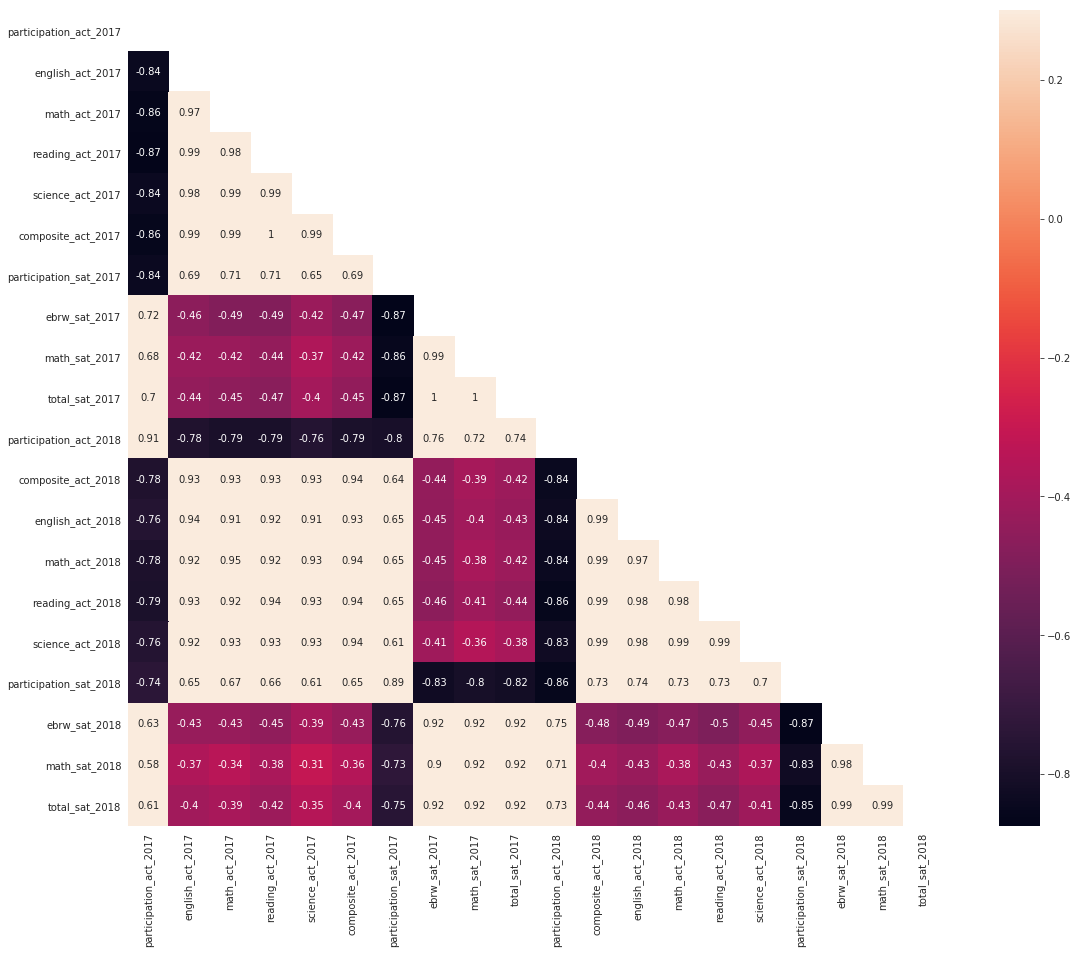

In [65]:
import seaborn as sns
plt.figure(figsize = (20,15))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final.corr())
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(final.corr(), mask=mask, vmax=.3, square=True, annot=True)

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [66]:
from scipy import stats

In [67]:
# Plot histograms for columns that we want

# Input:
# dataframe: a DataFrame
# list_of_columns : columns of the dataframe that we want to plot - list of string
# list_of_titles : titles of columns that we want to plot - list of string
# list_of_labels : labesl of columns that we want to plot - list of string

def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (10,10))
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i])
        ax[i].set_xlabel(list_of_xlabels[i])
        ax[i].set_ylim(0,22)

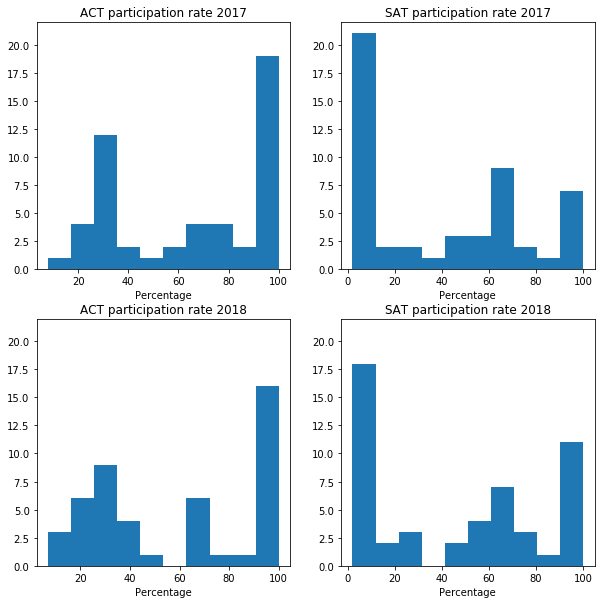

In [68]:
subplot_histograms(final, 
                   ['participation_act_2017','participation_sat_2017','participation_act_2018','participation_sat_2018'] , 
                   ["ACT participation rate 2017","SAT participation rate 2017","ACT participation rate 2018","SAT participation rate 2018"],
                   np.repeat(["Percentage"],4))

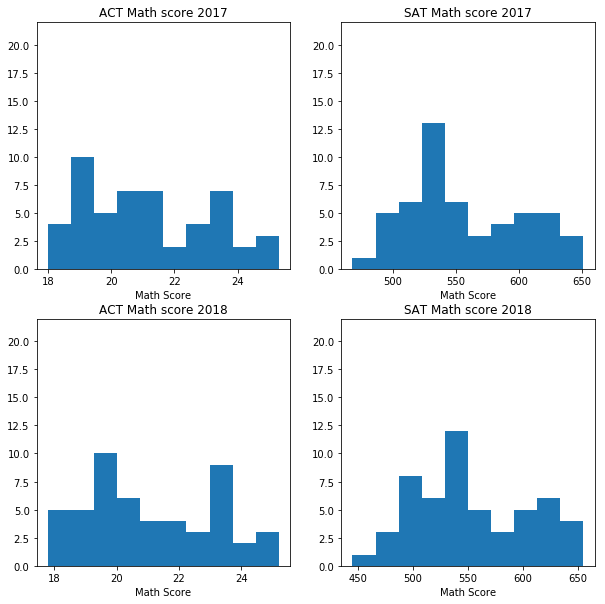

In [69]:
subplot_histograms(final, 
                   ['math_act_2017','math_sat_2017','math_act_2018','math_sat_2018'] , 
                   ["ACT Math score 2017","SAT Math score 2017","ACT Math score 2018","SAT Math score 2018"],
                   np.repeat(["Math Score"],4))

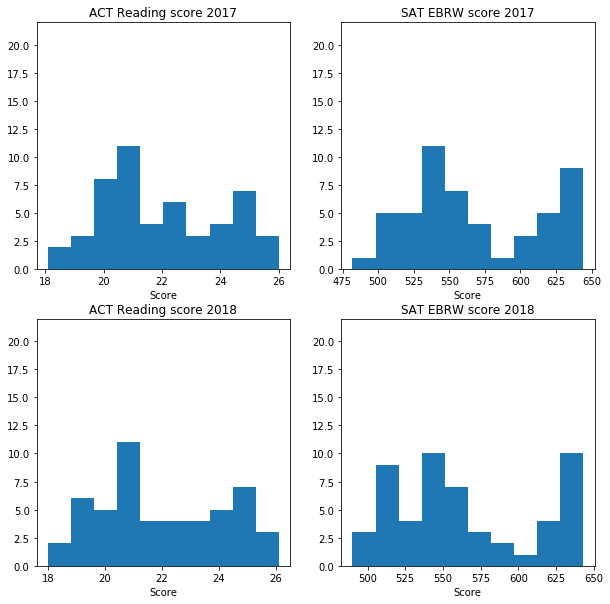

In [70]:
subplot_histograms(final, 
                   ['reading_act_2017','ebrw_sat_2017','reading_act_2018','ebrw_sat_2018'] , 
                   ["ACT Reading score 2017","SAT EBRW score 2017","ACT Reading score 2018","SAT EBRW score 2018"],
                   np.repeat(["Score"],4))

In [71]:
# Plot scatter plot for the 2 columns that we want in a certain year
# Input:
# df : DataFrame
# col1 : the first variable - string
# col2 : the second variable - string
# year: year that we want to plot - list of int
    
def scatter_plot(df, col1, col2, year):
    x_lab = (col1.replace("_"," ")).upper() + " " + str(year[0])
    if len(year) == 1:
        y_lab = (col2.replace("_"," ")).upper() + " " + str(year[0])
        plt.scatter(df[col1 + "_" + str(year[0])],final[col2 + "_" + str(year[0])], alpha=0.5)
    else:
        y_lab = (col2.replace("_"," ")).upper() + " " + str(year[1])
        plt.scatter(df[col1 + "_" + str(year[0])],final[col2 + "_" + str(year[1])], alpha=0.5)
    plt.title(x_lab + " vs " + y_lab)
    plt.xlabel(x_lab)
    plt.ylabel(y_lab)
    plt.show()

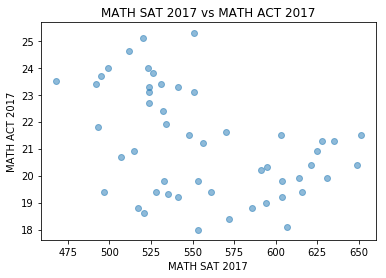

In [72]:
scatter_plot(final,"math_sat","math_act", [2017])

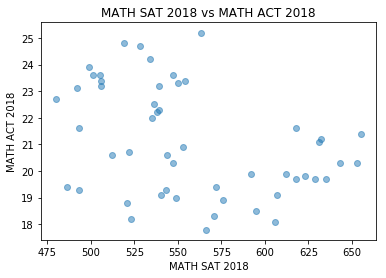

In [73]:
scatter_plot(final,"math_sat","math_act", [2018])

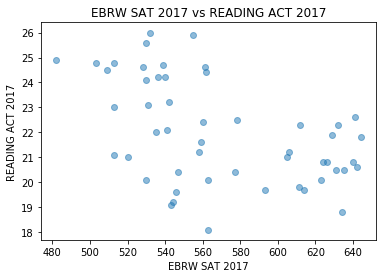

In [74]:
scatter_plot(final,"ebrw_sat","reading_act", [2017])

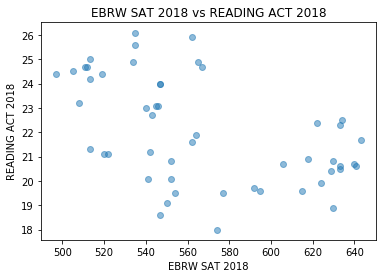

In [75]:
scatter_plot(final,"ebrw_sat","reading_act", [2018])

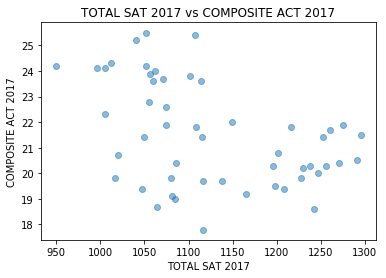

In [76]:
scatter_plot(final,"total_sat","composite_act", [2017])

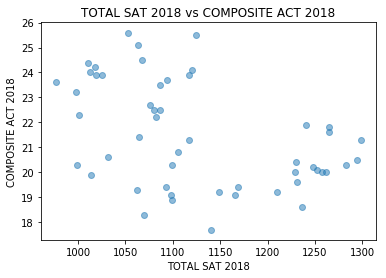

In [77]:
scatter_plot(final,"total_sat","composite_act", [2018])

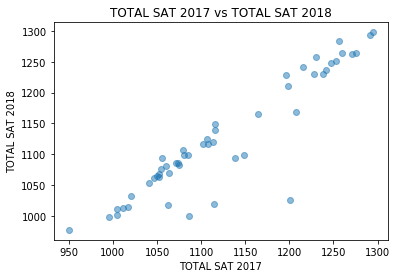

In [78]:
scatter_plot(final,"total_sat","total_sat", [2017,2018])

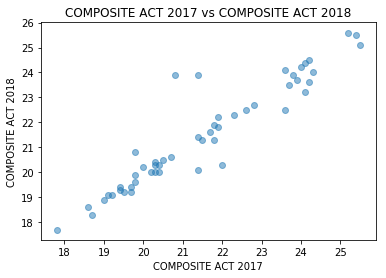

In [79]:
scatter_plot(final,"composite_act","composite_act", [2017,2018])

- We can see that SAT exam and CAT exam score is not really correlated with each other
- The total scores for SAT for 2017 and 2018 are highly correlated. The same thing can be said to the composite score for ACT 

In [80]:
# Plot box plot for the stated columns that we want in a certain year

# Input:
# dataframe : DataFrame
# subject : list of string
# exam : list of string
# year: year that we want to plot - list of string

def create_box_plot(dataframe,subject,exam,year):
    all_value = [subject,exam,year]
    all_combine = list(itertools.product(*all_value))
    all_col = ["_".join(i) for i in all_combine]
    fig, ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x="variable", y="value", data=pd.melt(dataframe[all_col]), ax=ax)
    

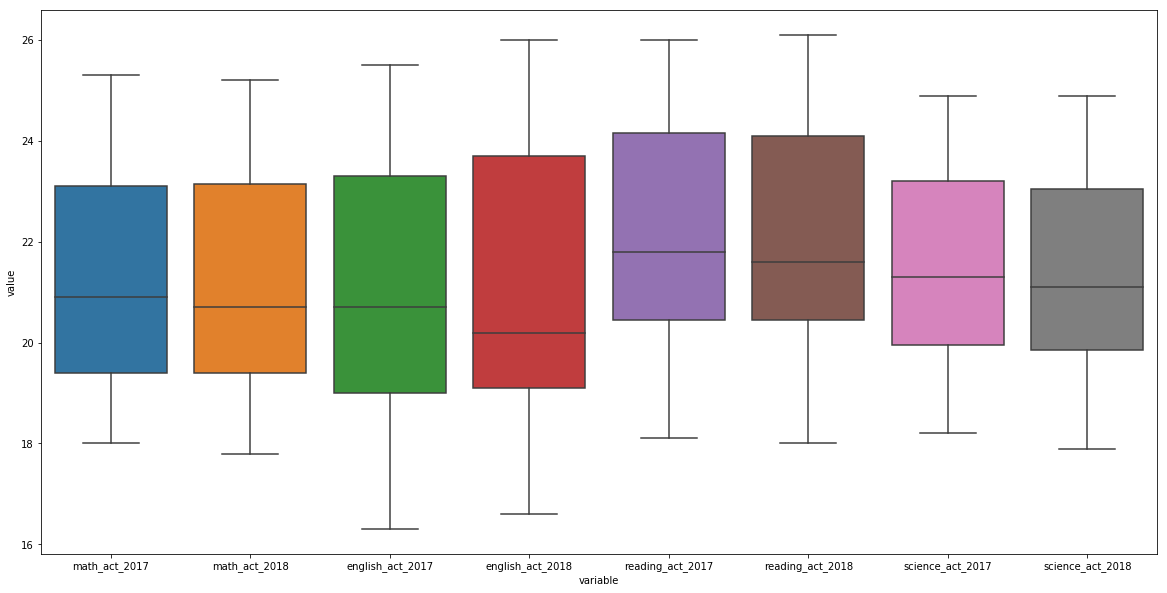

In [81]:
create_box_plot(final,["math","english","reading","science"],["act"],["2017","2018"])

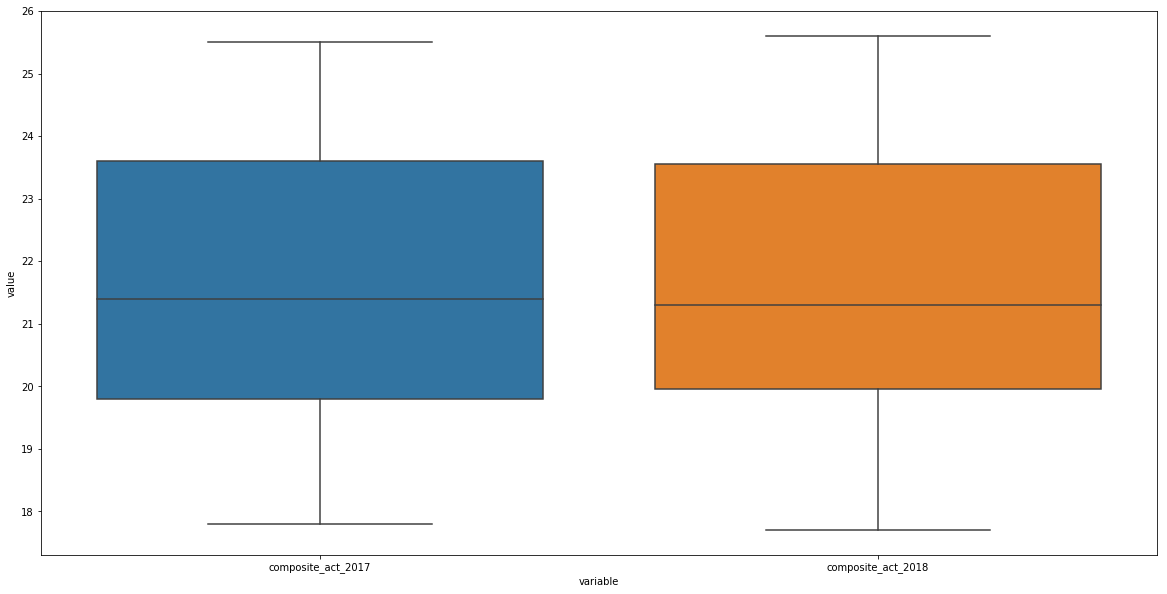

In [82]:
create_box_plot(final,["composite"],["act"],["2017","2018"])

- Generally, across all of the ACT subjects, students did better for ACT in 2018 than 2017. They performed well at reading but badly at english test

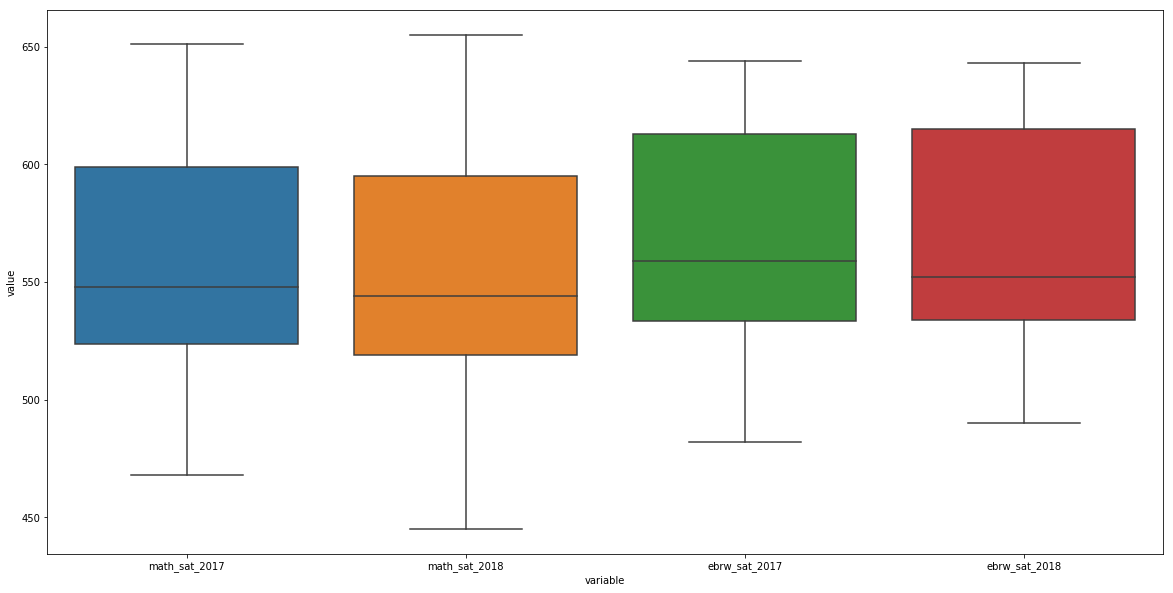

In [83]:
create_box_plot(final,["math","ebrw"],["sat"],["2017","2018"])

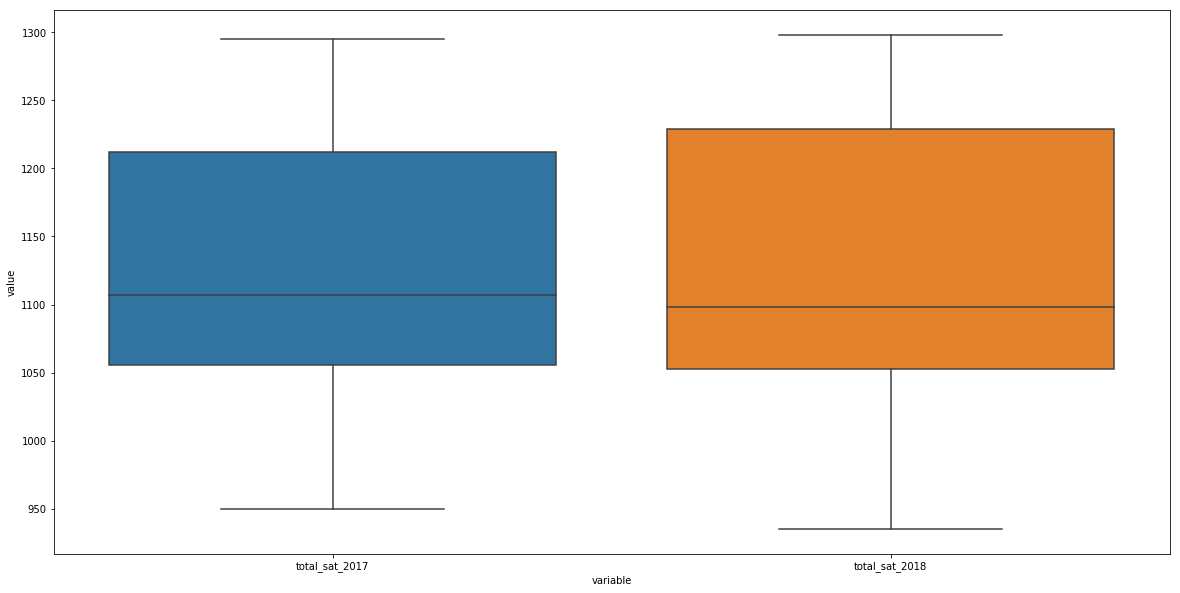

In [84]:
create_box_plot(final,["total"],["sat"],["2017","2018"])

- Students in average also did SAT test better in 2007 than 2018. However, the range of score in 2018 seemed to be larger, especially for math

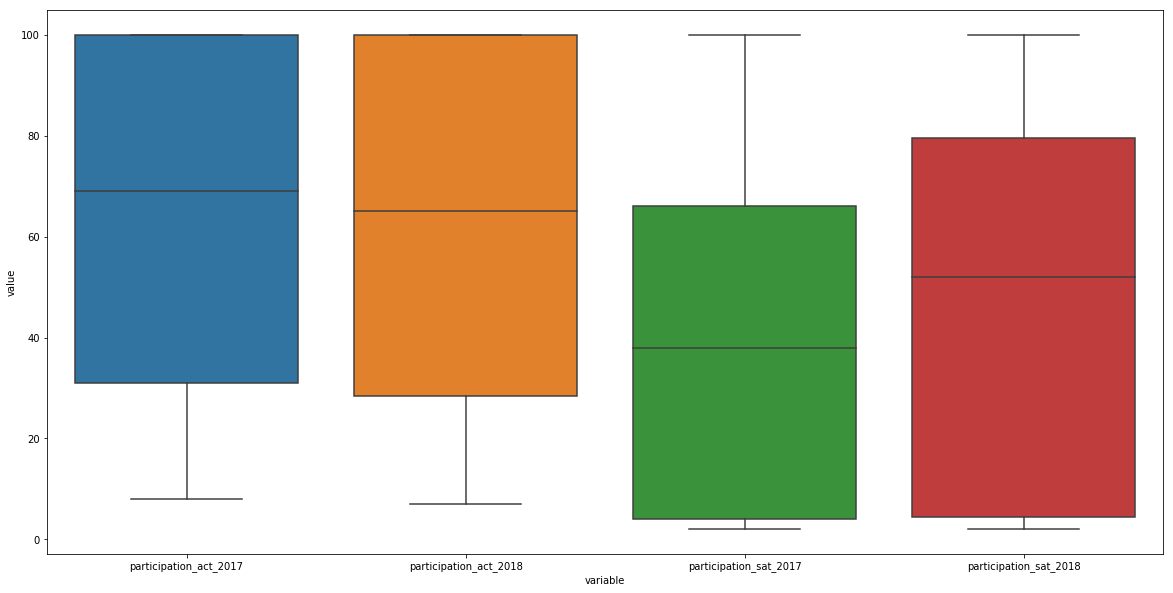

In [85]:
create_box_plot(final,["participation"],["act","sat"],["2017","2018"])

- There were more students participating in ACT in 2017, but less in 2018. This is understandable as students only need to take either one of these. An increase in the percentage of one test can leads to a decrease in the percentage of another test.

- Possibly, due to the increase in the participation rate in SAT in 2018, SAT scores in all subject decreased. This may due to the new exposure to the programme in certain state, leading to lack of preparation

In [86]:
# Edited code from https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
# need to install the package through conda:  conda install -c anaconda basemap

from __future__ import (absolute_import, division, print_function)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap as Basemap
from matplotlib.colors import rgb2hex, Normalize
from matplotlib.patches import Polygon
from matplotlib.colorbar import ColorbarBase

def plot_us(dataframe, subject, exam, year):
    
    col = subject + "_" + exam + "_" + str(year)
    columns = ["state"] + [col]
    pop_list = dataframe[columns]
    popdensity = {pop_list.state[i] : pop_list[col][i] for i in range(len(pop_list))}

    fig, ax = plt.subplots(figsize = (20,10))

    # Lambert Conformal map of lower 48 states.
    m = Basemap(llcrnrlon=-119,llcrnrlat=20,urcrnrlon=-64,urcrnrlat=49,
                projection='lcc',lat_1=33,lat_2=45,lon_0=-95)

    # Mercator projection, for Alaska and Hawaii
    m_ = Basemap(llcrnrlon=-190,llcrnrlat=20,urcrnrlon=-143,urcrnrlat=46,
                projection='merc',lat_ts=20)  # do not change these numbers

    #%% ---------   draw state boundaries  ----------------------------------------
    ## data from U.S Census Bureau
    ## http://www.census.gov/geo/www/cob/st2000.html
    shp_info = m.readshapefile('st99_d00','states',drawbounds=True,
                               linewidth=0.45,color='gray')
    shp_info_ = m_.readshapefile('st99_d00','states',drawbounds=False)

    #%% -------- choose a color for each state based on population density. -------
    colors={}
    statenames=[]
    cmap = plt.cm.magma_r # use 'reversed hot' colormap
    
    # part 0 - 100
    # sat total 800 - 1300
    # sat subject 400 - 700
    # act 17 - 28 
    
    # set range.
    if subject == "participation":
        vmin = 0 
        vmax = 100
    elif subject == "total":
        vmin = 800 
        vmax = 1300
    elif exam == "sat":
        vmin = 400 
        vmax = 700
    else :
        vmin = 17 
        vmax = 28
        
    norm = Normalize(vmin=vmin, vmax=vmax)
    for shapedict in m.states_info:
        statename = shapedict['NAME']
        # skip DC and Puerto Rico.
        if statename not in ['District of Columbia','Puerto Rico']:
            pop = popdensity[statename]
            # calling colormap with value between 0 and 1 returns
            # rgba value.  Invert color range (hot colors are high
            # population), take sqrt root to spread out colors more.
            colors[statename] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
        statenames.append(statename)

    #%% ---------  cycle through state names, color each one.  --------------------
    for nshape,seg in enumerate(m.states):
        # skip DC and Puerto Rico.
        if statenames[nshape] not in ['Puerto Rico', 'District of Columbia']:
            color = rgb2hex(colors[statenames[nshape]])
            poly = Polygon(seg,facecolor=color,edgecolor=color)
            ax.add_patch(poly)

    AREA_1 = 0.005  # exclude small Hawaiian islands that are smaller than AREA_1
    AREA_2 = AREA_1 * 30.0  # exclude Alaskan islands that are smaller than AREA_2
    AK_SCALE = 0.19  # scale down Alaska to show as a map inset
    HI_OFFSET_X = -1900000  # X coordinate offset amount to move Hawaii "beneath" Texas
    HI_OFFSET_Y = 250000    # similar to above: Y offset for Hawaii
    AK_OFFSET_X = -250000   # X offset for Alaska (These four values are obtained
    AK_OFFSET_Y = -750000   # via manual trial and error, thus changing them is not recommended.)

    for nshape, shapedict in enumerate(m_.states_info):  # plot Alaska and Hawaii as map insets
        if shapedict['NAME'] in ['Alaska', 'Hawaii']:
            seg = m_.states[int(shapedict['SHAPENUM'] - 1)]
            if shapedict['NAME'] == 'Hawaii' and float(shapedict['AREA']) > AREA_1:
                seg = [(x + HI_OFFSET_X, y + HI_OFFSET_Y) for x, y in seg]
                color = rgb2hex(colors[statenames[nshape]])
            elif shapedict['NAME'] == 'Alaska' and float(shapedict['AREA']) > AREA_2:
                seg = [(x*AK_SCALE + AK_OFFSET_X, y*AK_SCALE + AK_OFFSET_Y)\
                       for x, y in seg]
                color = rgb2hex(colors[statenames[nshape]])
            poly = Polygon(seg, facecolor=color, edgecolor='gray', linewidth=.45)
            ax.add_patch(poly)
            
    if (subject == "participation"):
        ax.set_title("US " + exam.upper() + " " + subject.capitalize() + " rate in " + str(year) + " by State.")
    else:
        ax.set_title("US " + exam.upper() + " " + subject.capitalize() + " score in " + str(year) + " by State.")

    #%% ---------  Plot bounding boxes for Alaska and Hawaii insets  --------------
    light_gray = [0.8]*3  # define light gray color RGB
    x1,y1 = m_([-190,-183,-180,-180,-175,-171,-171],[29,29,26,26,26,22,20])
    x2,y2 = m_([-180,-180,-177],[26,23,20])  # these numbers are fine-tuned manually
    m_.plot(x1,y1,color=light_gray,linewidth=0.8)  # do not change them drastically
    m_.plot(x2,y2,color=light_gray,linewidth=0.8)

    #%% ---------   Show color bar  ---------------------------------------
    ax_c = fig.add_axes([0.9, 0.1, 0.03, 0.8])
    if subject == "participation":
        lab = "Rate in %"
    else: lab = "Score"
    cb = ColorbarBase(ax_c,cmap=cmap,norm=norm,orientation='vertical',
                      label=lab)

    plt.show()

In [87]:
pip install mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


  Could not find a version that satisfies the requirement mpl_toolkits (from versions: )
No matching distribution found for mpl_toolkits


<Figure size 432x288 with 0 Axes>

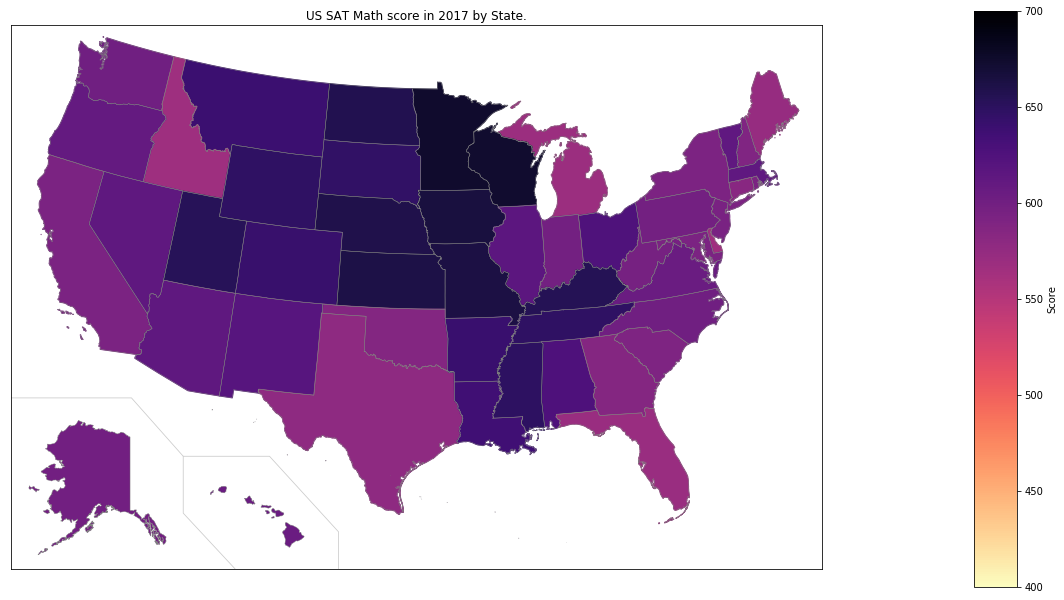

<Figure size 432x288 with 0 Axes>

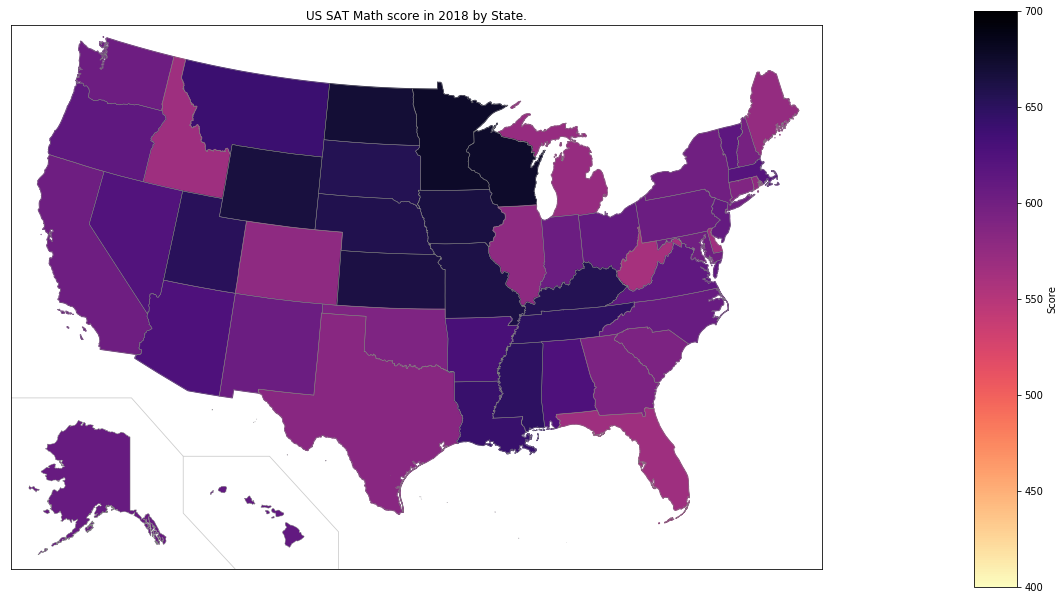

In [88]:
for i in [2017,2018]:
    plt.figure()
    plot_us(final,"math","sat",i)

- There is not really any difference in the Math SAT score across 2017 and 2018

<Figure size 432x288 with 0 Axes>

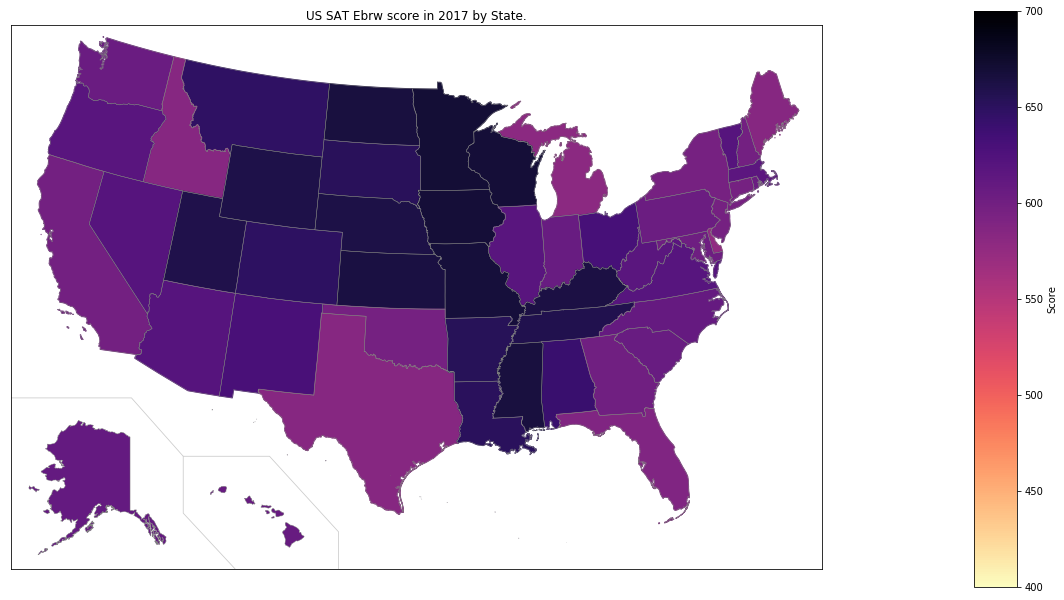

<Figure size 432x288 with 0 Axes>

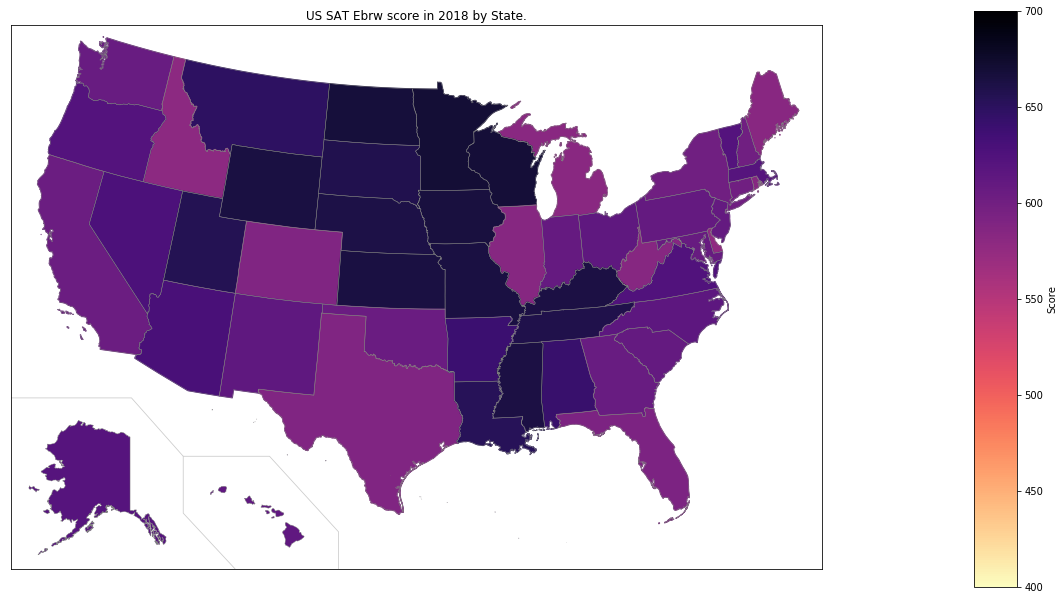

In [89]:
for i in [2017,2018]:
    plt.figure()
    plot_us(final,"ebrw","sat",i)

- There are a few states having the EBWR score increases greatly, but also a few having it decreases

<Figure size 432x288 with 0 Axes>

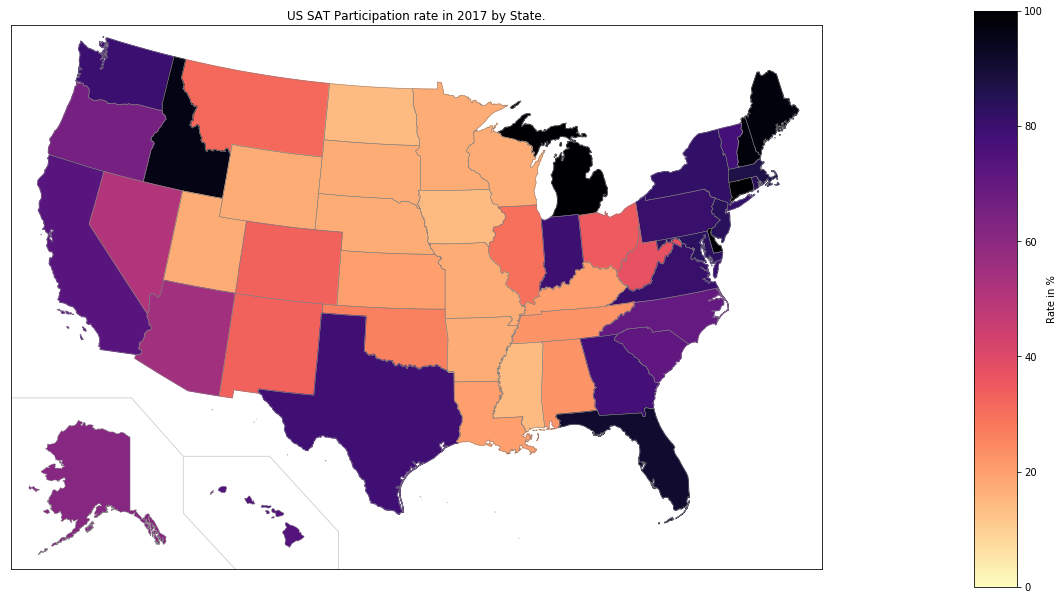

<Figure size 432x288 with 0 Axes>

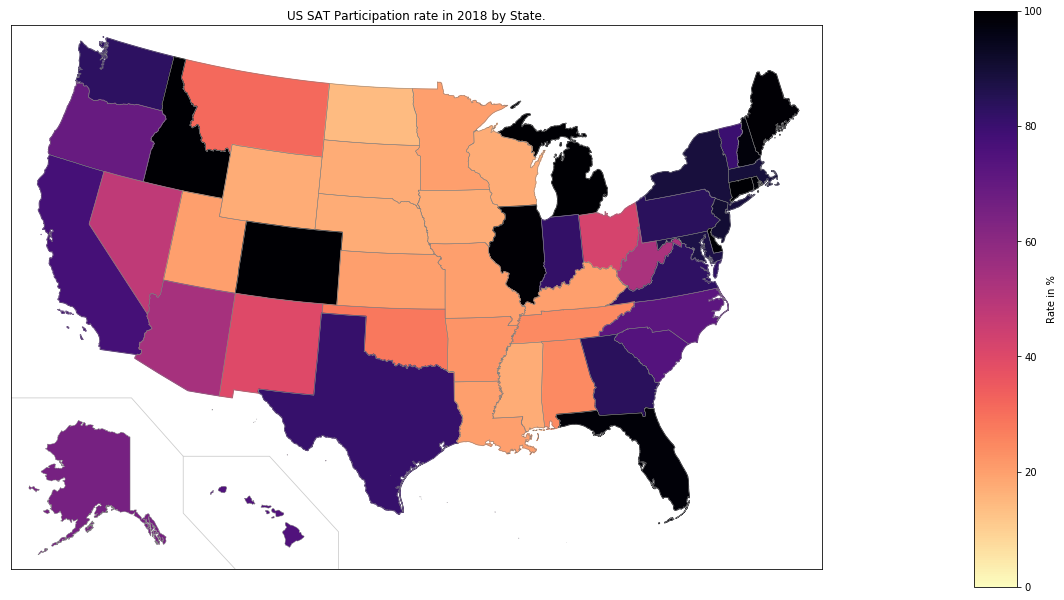

In [90]:
for i in [2017,2018]:
    plt.figure()
    plot_us(final,"participation","sat",i)

- We can clearly see that some states SAT participation rate increases significantly. Those are Illinois and Colorado

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

In [91]:
from scipy.stats import normaltest, skew, t

alpha = 0.05
for i in final.columns[1:]:
    k2, p = normaltest(final[-pd.isna(final[i])][i])
    if p < 0.05:
        print(i,"is not normally distributed since the p-value:", round(p,3), "is less than 0.05\n")
    else:
        print(i,"is normally distributed since the p-value:", round(p,3), "is greater than 0.05\n")

participation_act_2017 is not normally distributed since the p-value: 0.0 is less than 0.05

english_act_2017 is normally distributed since the p-value: 0.084 is greater than 0.05

math_act_2017 is not normally distributed since the p-value: 0.038 is less than 0.05

reading_act_2017 is not normally distributed since the p-value: 0.044 is less than 0.05

science_act_2017 is not normally distributed since the p-value: 0.049 is less than 0.05

composite_act_2017 is not normally distributed since the p-value: 0.038 is less than 0.05

participation_sat_2017 is not normally distributed since the p-value: 0.0 is less than 0.05

ebrw_sat_2017 is not normally distributed since the p-value: 0.001 is less than 0.05

math_sat_2017 is normally distributed since the p-value: 0.056 is greater than 0.05

total_sat_2017 is not normally distributed since the p-value: 0.008 is less than 0.05

participation_act_2018 is not normally distributed since the p-value: 0.0 is less than 0.05

composite_act_2018 i

- As we can see, most of the features are not normally distributed
- The only thing that is normally distributed is Math score for SAT
- A non-normal distribution will be an issue when people want to use a statistical tool that requires normally distributed data.

## Conclusions and Recommendations

- There are a lot of states such as Kentucky, Nevada, Arkansas having 100% ACT participation rate in both 2017 and 2018. This is because ACT is required in those state.
- Colorado interestingly has a really low SAT participation rate in 2017 but 100% in 2018. The reason is that Colardo Department of Education feels that their education system is more closely aligned with SAT
- Illinois SAT participation rate also increased by 90% from 2017 to 2018 due to Illinois contract expired with ACT
- Minnesota and Wisconsin were among the highest total SAT average in both 2017 and 2018, as only more competent or ambitious students in the states taking SAT